# PID: 

### Contents: 
1- [P-Controller](#P)

In [32]:
import numpy as np
from matplotlib import pyplot as plt

from robot import Robot

### First: class robot discovering

In [26]:
# Create robot: each robot must have x, y, orientation, stearing_drift
#                                    stearing_noise, distance_noise

r = Robot()
for key, value in r.__dict__.items():
    print(key, ": ", value)

x :  0.0
y :  0.0
orientation :  0.0
length :  20.0
steering_noise :  0.0
distance_noise :  0.0
steering_drift :  0.0


In [27]:
# Set robot values: 
# 1) set x, y, orientation
x = 10
y = 20
orientation = np.pi 
r.set(x, y, orientation)
for key, value in r.__dict__.items():
    print(key, ": ", value)

x :  10
y :  20
orientation :  3.141592653589793
length :  20.0
steering_noise :  0.0
distance_noise :  0.0
steering_drift :  0.0


In [28]:
# move: it takes speed(distance) and steering angle at the moving,
steering_angle = np.pi/10
speed = 1
r.move(steering_angle, speed)
for key, value in r.__dict__.items():
    print(key, ": ", value)

x :  9.000043988089928
y :  19.991877186252424
orientation :  3.1578386384014383
length :  20.0
steering_noise :  0.0
distance_noise :  0.0
steering_drift :  0.0


<a id='P'></a>
# P-Controller 

<font size=3> In this controller we assume that steering angle of car at each instant is inversely proportional to CTE (Cross Track Error).</font>
So, <br>
$$\theta_{steering} = -\tau \times CTE$$


<font size=4>**In following section,**</font> we will have an example in which: 
we start with: `x=0`, `y=1`, `orientation=0`

Our goal is to have a zero y position as possible as we can. (`CTE=y`),<br> We should move `100 moves` with constant `speed=1`, <br>we will use relation constant $\tau$ = `0.1`

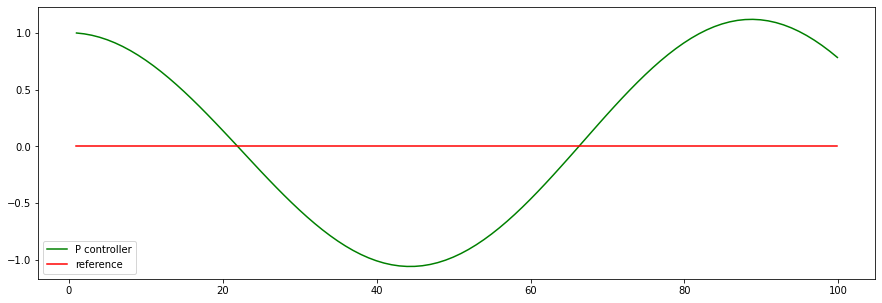

In [79]:
r = Robot()
r.set(0, 1, 0)
TAU = 0.3
speed = 1
n = 100

def P_Controller(r, tau=0.1, n=100):
    x_trajectory = []
    y_trajectory = []
    for i in range(n):

        cte = r.y
        steering_angle = -tau * cte
        r.move(steering_angle, speed)
        x_trajectory.append(r.x)
        y_trajectory.append(r.y)
    return x_trajectory, y_trajectory
        
x_trajectory, y_trajectory = P_Controller(r)

plt.figure(figsize=(15, 5))
plt.plot(x_trajectory, y_trajectory, 'g', label='P controller')
plt.plot(x_trajectory, np.zeros(100), 'r', label='reference')
plt.legend(loc="best");

# PD-Controller
In this controller steering angle also depends on derivatives of CTE in order of time, which will help us decrease oscilation (over shooting) as when CTE of car attempt to be zero we should decrease steerinng angle.

$$\theta_{steering} = -\tau_1 \times CTE - \tau_2 \times \frac{\partial}{\partial t}(CTE)$$


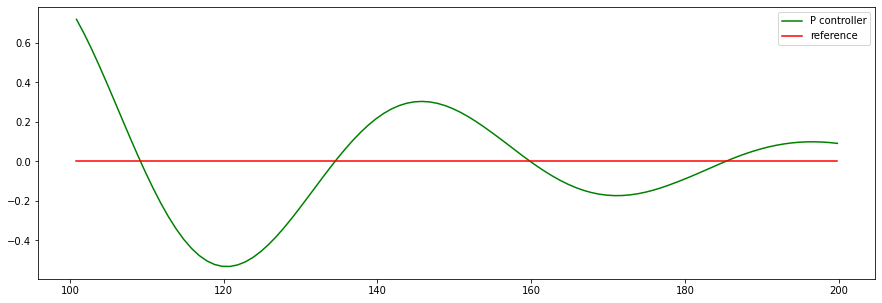

In [80]:
def PD_Controller(r, tau1=0.2, tau2=0.3, n=100):
    x_trajectory = []
    y_trajectory = []
    cte_ = r.y
    for i in range(n):
        cte = r.y
        steering_angle = -tau2 * cte - (cte - cte_) 
        r.move(steering_angle, speed)
        x_trajectory.append(r.x)
        y_trajectory.append(r.y)
        cte_ = cte
    return x_trajectory, y_trajectory

x_trajectory, y_trajectory = PD_Controller(r, 0.2, 0.3)
plt.figure(figsize=(15, 5))
plt.plot(x_trajectory, y_trajectory, 'g', label='P controller')
plt.plot(x_trajectory, np.zeros(100), 'r', label='reference')
plt.legend(loc="best");

# Systematic bias: 
it happens when system converge with large CTE (system has large bias so it converge at another point).

$$\theta_{steering} = -\tau_1 \times CTE - \tau_2 \times \frac{\partial}{\partial t}(CTE) - \tau_3 \times \int_t CTE \,dt $$


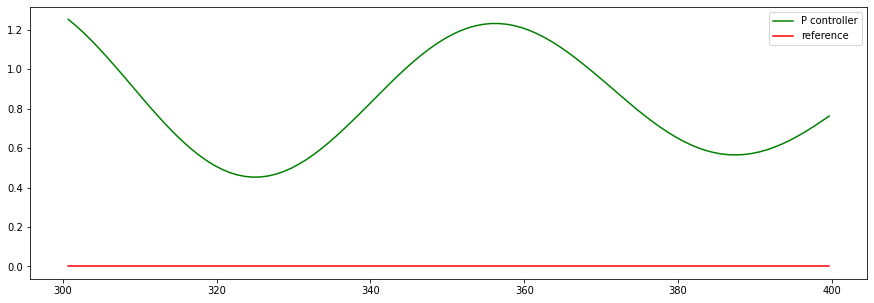

In [82]:
def PD_Controller(r, tau1=0.2, tau2=0.3, n=100):
    x_trajectory = []
    y_trajectory = []
    cte_ = r.y
    r.set_steering_drift(10 / 180*np.pi)
    for i in range(n):
        cte = r.y
        steering_angle = -tau1 * cte - tau2 * (cte - cte_) 
        r.move(steering_angle, speed)
        x_trajectory.append(r.x)
        y_trajectory.append(r.y)
        cte_ = cte
    return x_trajectory, y_trajectory

x_trajectory, y_trajectory = PD_Controller(r, 0.2, 0.3)
plt.figure(figsize=(15, 5))
plt.plot(x_trajectory, y_trajectory, 'g', label='P controller')
plt.plot(x_trajectory, np.zeros(100), 'r', label='reference')
plt.legend(loc="best");

# PID Controller
In this type, we use integrated error over last period and change steering according to this value so if we have large bias it will result in large error, So system will not converge at this point.


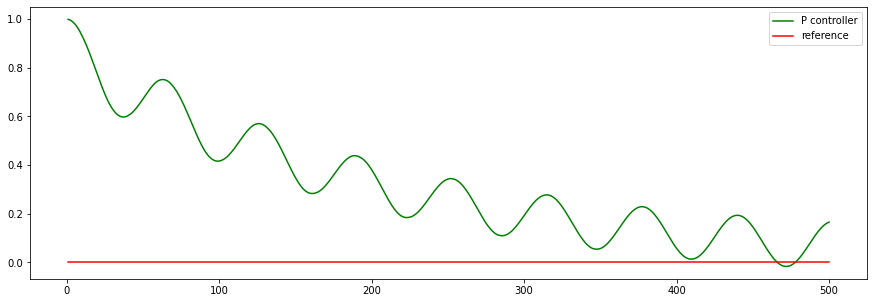

In [89]:
r = Robot()
r.set(0, 1, 0)
TAU = 0.3
speed = 1
n = 100

def PD_Controller(r, tau1=0.2, tau2=0.3, tau3=0.001, n=100):
    x_trajectory = []
    y_trajectory = []
    cte_ = r.y
    r.set_steering_drift(10 / 180*np.pi)
    error_int = 0
    for i in range(n):
        cte = r.y
        error_int += cte
        
        steering_angle = -tau1 * cte - tau2 * (cte - cte_) - tau3 * error_int 
        r.move(steering_angle, speed)
        x_trajectory.append(r.x)
        y_trajectory.append(r.y)
        cte_ = cte
    return x_trajectory, y_trajectory

n = 500
x_trajectory, y_trajectory = PD_Controller(r, 0.2, 0.3, n=n)
plt.figure(figsize=(15, 5))
plt.plot(x_trajectory, y_trajectory, 'g', label='P controller')
plt.plot(x_trajectory, np.zeros(n), 'r', label='reference')
plt.legend(loc="best");